In [41]:
# 导入依赖包
import pandas as pd

In [42]:
import numpy as np

In [43]:
from sklearn import preprocessing

In [44]:
import seaborn as sns

In [45]:
import matplotlib.pyplot as plt

In [46]:
# 导入数据
wine = pd.read_csv("D:/input/wine.csv")
wine.head(5)

Class  Alcohol  Malic acid  Attribute  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0      1    14.23        1.71       2.43        15.6         127        2.80   
1      1    13.20        1.78       2.14        11.2         100        2.65   
2      1    13.16        2.36       2.67        18.6         101        2.80   
3      1    14.37        1.95       2.50        16.8         113        3.85   
4      1    13.24        2.59       2.87        21.0         118        2.80   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0        3.06        0.28        2.29         5.64         1.04         3.92   
1        2.76        0.26        1.28         4.38         1.05         3.40   
2        3.24        0.30        2.81         5.68         1.03         3.17   
3        3.49        0.24        2.18         7.80         0.86         3.45   
4        2.69        0.39        1.82         4.32         1.04         2.93   

   Unnamed: 13  
0         1065  
1         1050  
2         1185  
3         1480  
4          735

In [47]:
# 0-1:
minmax_scale = preprocessing.MinMaxScaler().fit(wine[['Unnamed: 4','Unnamed: 5']])
np_minmax = minmax_scale.transform(wine[['Unnamed: 4','Unnamed: 5']])

# z-score:
std_scale = preprocessing.StandardScaler().fit(wine[['Unnamed: 4','Unnamed: 5']])
np_std = std_scale.transform(wine[['Unnamed: 4','Unnamed: 5']])

In [48]:
# 0-1标准化后，两个特征变量的最小值
print("0-1标准化后两个指标的最小值：\n", "Unnamed: 4最小值为", np_minmax[:, 0].min(), "Unnamed: 5最小值为", np_minmax[:, 1].min())
# 0-1标准化后，两个特征变量的最大值
print("0-1标准化后两个指标的最大值：\n", "Unnamed: 4最大值为", np_minmax[:, 0].max(), "Unnamed: 5最大值为", np_minmax[:, 1].max())

0-1标准化后两个指标的最小值：
 Unnamed: 4最小值为 0.0 Unnamed: 5最小值为 0.0
0-1标准化后两个指标的最大值：
 Unnamed: 4最大值为 1.0 Unnamed: 5最大值为 1.0


In [49]:
# z-score标准化后，两个特征变量的最小值
print("z-score标准化后两个指标的最小值：\n", "Unnamed: 4最小值为", np_std[:, 0].min(), "Unnamed: 5最小值为", np_std[:, 1].min())
# z-score标准化后，两个特征变量的最大值
print("z-score标准化后两个指标的最大值：\n", "Unnamed: 4最大值为", np_std[:, 0].max(), "Unnamed: 5最大值为", np_std[:, 1].max())

z-score标准化后两个指标的最小值：
 Unnamed: 4最小值为 -2.6710181364687173 Unnamed: 5最小值为 -2.0882551982316313
z-score标准化后两个指标的最大值：
 Unnamed: 4最大值为 3.1545107139410433 Unnamed: 5最大值为 4.371372139554768


In [50]:
# 0-1标准化后
print("0-1标准化后前五行")
print(np_minmax[0:5,:])

0-1标准化后前五行
[[0.25773196 0.61956522]
 [0.03092784 0.32608696]
 [0.41237113 0.33695652]
 [0.31958763 0.4673913 ]
 [0.53608247 0.52173913]]


In [51]:
# z-score标准化后
print("z-score标准化后前五行")
print(np_std[0:5,:])

z-score标准化后前五行
[[-1.16959318  1.91390522]
 [-2.49084714  0.01814502]
 [-0.2687382   0.08835836]
 [-0.80925118  0.93091845]
 [ 0.45194578  1.28198515]]


In [52]:
# 获取数据备份
df_minmax = wine.copy()
df_std = wine.copy()
df_minmax[['Unnamed: 4','Unnamed: 5']] = np_minmax
df_std[['Unnamed: 4','Unnamed: 5']] = np_std
# 合并数据集
wine_contrast = pd.concat([wine, df_minmax, df_std], axis=0)
#测试来看 df_minmax以及df_std直接被拼接在了wine后面 但是行标不变 还是0——177

<Figure size 1000x1000 with 0 Axes>

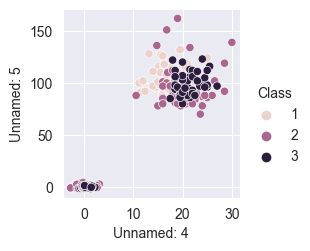

In [53]:
# 创建合并数据集的图像
plt.figure(figsize=(10, 10))
sns.pairplot(hue="Class", data=wine_contrast, x_vars="Unnamed: 4", y_vars="Unnamed: 5")
plt.show()

<Figure size 1000x1000 with 0 Axes>

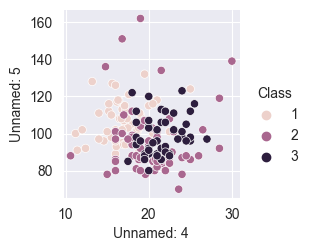

In [54]:
plt.figure(figsize=(10, 10))
sns.pairplot(hue="Class", data=wine, x_vars="Unnamed: 4", y_vars="Unnamed: 5")
plt.show()

<Figure size 1000x1000 with 0 Axes>

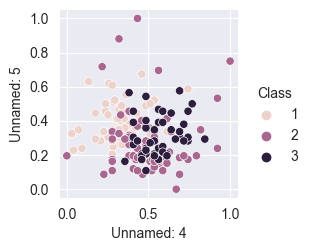

In [55]:
# 0-1
plt.figure(figsize=(10, 10))
sns.pairplot(hue="Class", data=df_minmax, x_vars="Unnamed: 4", y_vars="Unnamed: 5")
plt.show()

<Figure size 1000x1000 with 0 Axes>

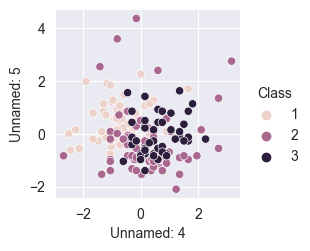

In [56]:
#zscore
plt.figure(figsize=(10, 10))
sns.pairplot(hue="Class", data=df_std, x_vars="Unnamed: 4", y_vars="Unnamed: 5")
plt.show()

In [57]:
# 保存0-1标准化后的数据
df_minmax.to_csv("D:/output/minmax.csv",index = False)

In [58]:
# 保存z-score标准化后的数据
df_std.to_csv("D:/output/std.csv",index = False)